In [35]:
using Plots; gr();
using HDF5
using DelimitedFiles
using Statistics

In [4]:
samples = h5read("data/remote/mcmc_out.h5", "samples")
ign, h = readdlm("../data/remote/base_nobin/bsr_ignmajors_1.csv", ',', header=true)

([1.0 72.49576 … 30.97617 0.0; 2.0 64.22882 … 43.56536 0.0; … ; 99999.0 62.02645 … 34.27961 0.0; 100000.0 63.72973 … 40.9444 0.0], AbstractString["index" "SiO2" … "lower" "exhumed"])

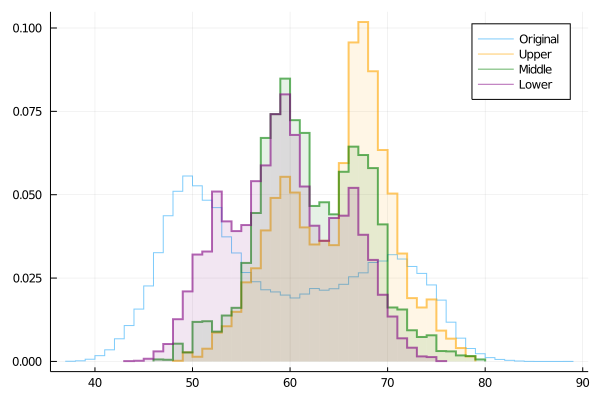

In [51]:
elt = 1
stephist(ign[:,elt+1], normalize=:pdf, label="Original", alpha=.5)
stephist!(samples[1,50:end,elt], normalize=:pdf, label="Upper", alpha=.6, linewidth=2, linecolor=:orange)
histogram!(samples[1,50:end,elt], normalize=:pdf, label=false, alpha=.1, linewidth=0, color=:orange)

stephist!(samples[2,50:end,elt], normalize=:pdf, label="Middle", alpha=.6, linewidth=2,linecolor=:green)
histogram!(samples[2,50:end,elt], normalize=:pdf, label=false, alpha=.1, linewidth=0, color=:green)

stephist!(samples[3,50:end,elt], normalize=:pdf, label="Lower", alpha=.6, linewidth=2, linecolor=:purple)
histogram!(samples[3,50:end,elt], normalize=:pdf, label=false, alpha=.1, linewidth=0, color=:purple)

#savefig("../../present/4_7/mcmc.png")

In [7]:
ll = h5read("data/remote/mcmc_out.h5", "loglike");

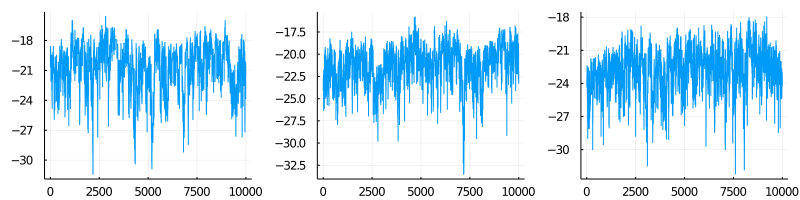

In [46]:
p = []
for l in 1:3
    p1 = plot(ll[l,:], legend=false)
    push!(p, p1)
end 
plot(p..., layout = (1,3), size=(800,200))
#savefig("../../present/4_7/acceptance_ratio.png")

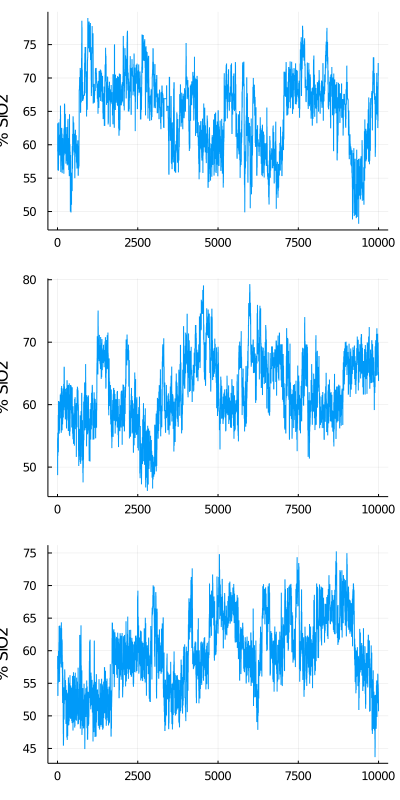

In [45]:
p = []
for l in 1:3
    p1 = plot(samples[l,:,1], legend=false, ylabel="% SiO2")
    push!(p, p1)
end 
plot(p..., layout = (3,1), size=(400,800))
#savefig("../../present/4_7/sio2_over_iter.png")

In [33]:
accepted = h5read("data/remote/mcmc_out.h5", "accepted");

In [37]:
mean(accepted, dims=2)

3×1 Array{Float64,2}:
 0.3159
 0.4027
 0.4405